<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/Calibration_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [2]:
!git clone https://github.com/wuchenyu38/18ma573chenyuwu.git #only once

Cloning into '18ma573chenyuwu'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 253 (delta 15), reused 0 (delta 0), pack-reused 203
Receiving objects: 100% (253/253), 310.20 KiB | 8.62 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [3]:
cd /content/18ma573chenyuwu/src/

/content/18ma573chenyuwu/src


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Sde_1d, Gbm_1d
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so

Functions Used in Asian Price
$$\hat{\mu}=\frac{\mu}{2}$$
$$\hat{\sigma}^2=\frac{\sigma^2(2m+1)}{6(m+1)}$$
$$\hat{r}=\hat{\mu}+\frac{1}{2}\hat{\sigma}^2$$

In [0]:
def bsm_geometric_asian_price(self, 
                              otype = 1,
                              strike = 110,
                              maturity = 1,
                              num_step = 4):
                              sigma = self.vol_ratio
                              S0=self.init_state
                              T = maturity
                              K = strike
                              r = self.drift_ratio
                              m = num_step
                              mu = r-.5*sigma**2
                              mu_hat = .5*mu
                              sigma_hat_sq=sigma**2*(2*m+1)/(6*(m+1))
                              r_hat = mu_hat+.5*sigma_hat_sq
                              sigma_hat = np.sqrt(sigma_hat_sq)
                              if otype ==1:
                                option = VanillaOption(otype = 1, strike = K, maturity= T, market_price=15.)
                                return float(np.exp([(r_hat-r)*T])*Gbm_1d(init_state=S0, drift_ratio=r_hat, vol_ratio=sigma_hat).bsm_price(option))
                              else:
                                option=VanillaOption(otype = -1, strike = K, maturity= T, market_price=15.)
                                return float(np.exp([(r_hat-r)*T])*Gbm_1d(init_state=S0, drift_ratio=r_hat, vol_ratio=sigma_hat).bsm_price(option))

In [25]:
Gbm_1d.bsm_geometric_asian_price = bsm_geometric_asian_price
gbm1=Gbm_1d(init_state =100, drift_ratio= 0.0475, vol_ratio=0.2)
gao1=gbm1.bsm_geometric_asian_price(otype = 1, 
                                    strike = 110., 
                                    maturity = 1., 
                                    num_step = 4.)
print('>>>>> geometric call option value is ' + str(gao1))

>>>>> geometric call option value is 1.607164727431734


In [0]:
def erro_function(sigma, strike_list,market_price_list):
  erro=0
  gbm1 = Gbm_1d(init_state=spot, drift_ratio=rate, vol_ratio=sigma)
  for strike, market_price in zip(strike_list,market_price_list):
    erro+=(gbm1.bsm_geometric_asian_price(otype=1, strike=strike,maturity=maturity, num_step=8)-market_price)**2
  return erro
    
def calibration_Absm(strike_list,market_price_list):
  init_vol=.1
  return so.fmin(erro_function, init_vol, args = (strike_list, market_price_list), disp = 0)[0]

In [0]:
spot = 100
rate =.05
otype = 1
maturity = 2/12
num_step = 8
strike_list = [97, 99, 101, 103]
market_price_list = [3.7925736094875964,
                    2.5429985313737244,
                    1.6026613800895042,
                    0.9366198675047346]
calibrated_vol = 0.18109375000000028

In [33]:
vol=calibration_Absm(strike_list,market_price_list)
print('>>>>>>>>> calibrated vol is '+str(vol))

>>>>>>>>> calibrated vol is 0.20257812500000033


In [35]:
values=[]
gbm1 = Gbm_1d(init_state=spot, drift_ratio=rate, vol_ratio=vol)
for strike, market_price in zip(strike_list,market_price_list):
  values.append(gbm1.bsm_geometric_asian_price(otype=1, strike=strike,maturity=maturity, num_step=8))
print('>>>>>>>>> calibrated price are:\n ')
for value in values:
  print(value)

>>>>>>>>> calibrated price are:
 
3.9397222494782103
2.5789391451123804
1.545406418873814
0.8404502752683524


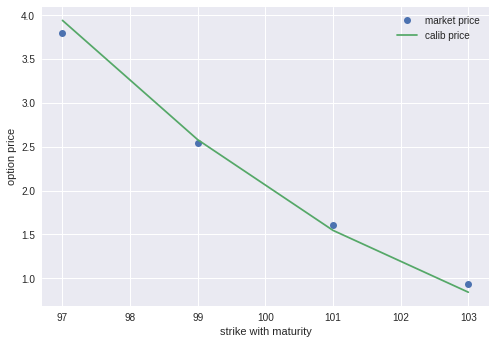

In [36]:
x_co = strike_list
y_co = market_price_list
plt.plot(x_co, y_co, 'o', label='market price')

y_co = values
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with maturity')
plt.legend()
plt.show()